In [1]:
# # Install packages not present in default Colab environment
# !pip install numpyro posteriordb

In [2]:
# # Get the PosteriorDB
# !git clone https://github.com/stan-dev/posteriordb.git

# 1. PosteriorDB

See https://arxiv.org/abs/2407.04967v1

In [3]:
from posteriordb import PosteriorDatabase
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pdb_path = "../../posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

In [5]:
posterior = my_pdb.posterior("diamonds-diamonds")

p_model = posterior.model
p_data = posterior.data

## 1.1. Accessing the data

In [6]:
p_data.information

{'name': 'diamonds',
 'keywords': ['ggplot2', 'tidyverse'],
 'title': 'Diamonds data frame for brms generated by brms::make_standata',
 'description': 'ggplot2 Diamonds data set for brms',
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': 'wickham2016ggplot2',
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [7]:
print(p_data.information["description"])

ggplot2 Diamonds data set for brms


In [8]:
values_dict = p_data.values()
for key, vals in values_dict.items():
    print(f"{key}: {type(vals)}")

N: <class 'int'>
Y: <class 'list'>
K: <class 'int'>
X: <class 'list'>
prior_only: <class 'int'>


In [9]:
data = {key: np.array(val) for key, val in values_dict.items() if type(val) is list}
data_rest = {key: val for key, val in values_dict.items() if type(val) is not list}

In [10]:
data

{'Y': array([7.99260665, 8.247482  , 8.31678913, ..., 8.18646443, 7.94520113,
        8.94585386], shape=(5000,)),
 'X': array([[1.        , 0.82      , 1.79175947, ..., 1.46924276, 1.47333255,
         1.07725341],
        [1.        , 0.9       , 1.8050047 , ..., 1.62450423, 1.62745989,
         1.21326583],
        [1.        , 0.9       , 1.83418019, ..., 1.65076217, 1.64354481,
         1.18476741],
        ...,
        [1.        , 1.01      , 1.84687877, ..., 1.86534756, 1.87169978,
         1.38489253],
        [1.        , 0.7       , 1.74221902, ..., 1.21955332, 1.21339672,
         0.88883238],
        [1.        , 1.32      , 1.96290773, ..., 2.5910382 , 2.57986747,
         1.92537183]], shape=(5000, 25))}

## 1.2. Accessing the model

In [11]:
p_model.information

{'name': 'diamonds',
 'keywords': ['stan_benchmark', 'linear regression'],
 'title': 'Multiple Highly Correlated Predictors Log-Log Model',
 'prior': {'keywords': 'stan_recommended_35dbfe6'},
 'description': 'log(price) ~ carat * (log(x) + log(y) + log(z)) + cut + color + clarity',
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': 'bales2019selecting',
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [12]:
print(p_model.stan_code())

// generated with brms 2.10.0

functions {
  
}
data {
  int<lower=1> N; // number of observations
  vector[N] Y; // response variable
  int<lower=1> K; // number of population-level effects
  matrix[N, K] X; // population-level design matrix
  int prior_only; // should the likelihood be ignored?
}
transformed data {
  int Kc = K - 1;
  matrix[N, Kc] Xc; // centered version of X without an intercept
  vector[Kc] means_X; // column means of X before centering
  for (i in 2 : K) {
    means_X[i - 1] = mean(X[ : , i]);
    Xc[ : , i - 1] = X[ : , i] - means_X[i - 1];
  }
}
parameters {
  vector[Kc] b; // population-level effects
  // temporary intercept for centered predictors
  real Intercept;
  real<lower=0> sigma; // residual SD
}
transformed parameters {
  
}
model {
  // priors including all constants
  target += normal_lpdf(b | 0, 1);
  target += student_t_lpdf(Intercept | 3, 8, 10);
  target += student_t_lpdf(sigma | 3, 0, 10)
            - 1 * student_t_lccdf(0 | 3, 0, 10);
  // l

## 1.3. Accessing the posterior

In [13]:
posterior.information

{'keywords': ['stan benchmark', 'linear regression', 'pathfinder paper'],
 'urls': 'https://github.com/bbbales2/cmdstan-warmup/blob/develop/examples/diamonds',
 'references': ['bales2019selecting', 'wickham2016ggplot2'],
 'dimensions': {'b': 24, 'Intercept': 1, 'sigma': 1},
 'added_date': '2020-02-01',
 'added_by': 'Oliver Järnefelt'}

In [14]:
posterior.name

'diamonds-diamonds'

In [15]:
posterior.reference_draws_info()['inference']

{'method': 'stan_sampling',
 'method_arguments': {'chains': 10,
  'iter': 20000,
  'warmup': 10000,
  'thin': 10,
  'seed': 4711,
  'control': {'adapt_delta': 0.99, 'max_treedepth': 20}}}

In [16]:
posterior.reference_draws_info()["diagnostics"]

{'diagnostic_information': {'names': ['b[1]',
   'b[2]',
   'b[3]',
   'b[4]',
   'b[5]',
   'b[6]',
   'b[7]',
   'b[8]',
   'b[9]',
   'b[10]',
   'b[11]',
   'b[12]',
   'b[13]',
   'b[14]',
   'b[15]',
   'b[16]',
   'b[17]',
   'b[18]',
   'b[19]',
   'b[20]',
   'b[21]',
   'b[22]',
   'b[23]',
   'b[24]',
   'Intercept',
   'sigma']},
 'ndraws': 10000,
 'nchains': 10,
 'effective_sample_size_bulk': [9887.7459603498,
  10310.438346761,
  10137.7414052872,
  10136.1230533179,
  10057.2361933595,
  9730.31848970419,
  9574.49918784441,
  9846.43494375318,
  9861.5479075935,
  10118.422678104,
  9964.0802437337,
  10171.9101417965,
  9892.86685555493,
  9628.9211135197,
  9934.00450797643,
  9527.67038371501,
  10105.2621133498,
  10106.4605745892,
  9921.45279461561,
  10165.0651379118,
  10104.7170513001,
  9975.19365420567,
  9976.0976472878,
  10049.5584138559,
  9947.6813758736,
  10051.4476397944],
 'effective_sample_size_tail': [9999.00820858923,
  9911.87449276965,
  9614.38

Convergence diagnostic $\hat{R}$ is used: https://doi.org/10.1214/20-BA1221

In [17]:
reference_draws = posterior.reference_draws()
len(reference_draws)

10

Data structure:

[

    {                     - chain1
        param1: [...],
        param2: [...],
        ...
    },
    
    {...},                - chain2,

    ...
    
    {...}                 - chain10
]

In [18]:
reference_draws[0].keys()

dict_keys(['b[1]', 'b[2]', 'b[3]', 'b[4]', 'b[5]', 'b[6]', 'b[7]', 'b[8]', 'b[9]', 'b[10]', 'b[11]', 'b[12]', 'b[13]', 'b[14]', 'b[15]', 'b[16]', 'b[17]', 'b[18]', 'b[19]', 'b[20]', 'b[21]', 'b[22]', 'b[23]', 'b[24]', 'Intercept', 'sigma'])

In [19]:
# Combine all chain draws into a single DataFrame and add chain identifier
reference_draws_df = pd.concat([
    pd.DataFrame(chain_draw).assign(chain_id=i)
    for i, chain_draw in enumerate(reference_draws)
])

# reference_draws_df["step"] = reference_draws_df.index

# Rename beta columns to adjust the indices for later usage
# reference_draws_df.rename(columns={f"beta[{i+1}]": f"beta[{i}]" for i in range(3)}, inplace=True)

reference_draws_df

,b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9],b[10],...,b[18],b[19],b[20],b[21],b[22],b[23],b[24],Intercept,sigma,chain_id
0,6.558847,6.105568,-4.492008,1.568187,0.135701,-0.042189,0.024993,0.005900,-0.447776,-0.093153,...,-0.061160,0.019884,-0.007028,0.025016,-5.757860,4.384663,-1.532415,7.792967,0.123401,0
1,6.852109,6.088976,-4.309645,1.302592,0.138684,-0.050193,0.033765,-0.001087,-0.450925,-0.093300,...,-0.048296,0.022392,-0.000269,0.026784,-5.822103,4.250303,-1.427493,7.788057,0.122009,0
2,6.650531,6.013908,-4.449779,1.573739,0.124625,-0.032638,0.019638,-0.004168,-0.446881,-0.101230,...,-0.049002,0.018172,0.006315,0.038363,-5.865965,4.396349,-1.451338,7.789234,0.123128,0
3,6.745017,6.412219,-4.962492,1.620767,0.140603,-0.044739,0.028786,-0.000455,-0.444529,-0.095642,...,-0.052483,0.022589,-0.000317,0.026576,-5.878313,4.555128,-1.685576,7.788277,0.124471,0
4,6.529848,6.296251,-4.852639,1.725669,0.127325,-0.035958,0.021422,-0.002392,-0.446059,-0.098158,...,-0.061284,0.009773,-0.009712,0.029008,-6.053156,4.705672,-1.548416,7.791229,0.123913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.025499,6.244067,-4.727564,1.473449,0.119349,-0.024811,0.012453,0.002247,-0.444085,-0.097014,...,-0.067020,0.016457,-0.003508,0.031003,-6.246064,4.775748,-1.638362,7.786106,0.124281,9
996,6.368991,6.570109,-4.979740,1.633528,0.129311,-0.037383,0.019042,0.000066,-0.443848,-0.086430,...,-0.067332,0.018883,-0.001965,0.025891,-6.231889,4.953932,-1.550342,7.786309,0.121693,9
997,7.341036,6.242754,-4.952205,1.537745,0.122536,-0.034910,0.019735,0.011126,-0.448693,-0.100573,...,-0.062113,0.019496,-0.003769,0.029488,-6.199628,4.750627,-1.818325,7.787158,0.126018,9
998,6.347526,6.585266,-4.729307,1.398987,0.146274,-0.048597,0.020630,0.004267,-0.453920,-0.091332,...,-0.065856,0.027186,-0.005134,0.031181,-6.160192,4.674922,-1.279399,7.788346,0.122748,9


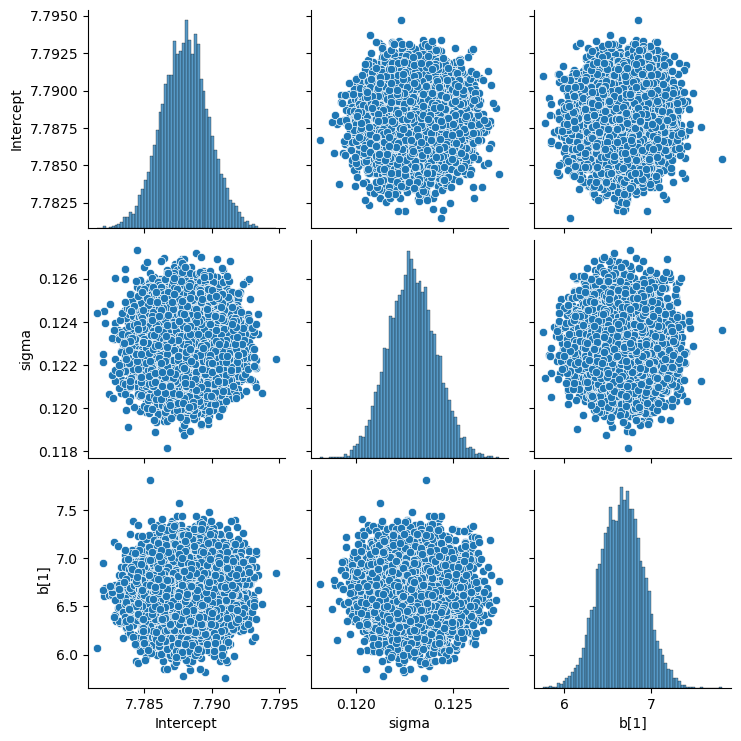

In [20]:
sns.pairplot(reference_draws_df, vars=["Intercept", "sigma", "b[1]"])

In [21]:
# sns.scatterplot(reference_draws_df, x=reference_draws_df.index, y="sigma", marker='.')

In [22]:
reference_draws_df.drop(columns=["chain_id"], inplace=True)

# 2. NumPyro

See https://num.pyro.ai/en/latest/index.html

In [23]:
import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
from numpyro.infer.inspect import render_model
from jax import random
import jax.numpy as jnp

## 2.1. Specifying the model

In [24]:
print(p_model.stan_code())

// generated with brms 2.10.0

functions {
  
}
data {
  int<lower=1> N; // number of observations
  vector[N] Y; // response variable
  int<lower=1> K; // number of population-level effects
  matrix[N, K] X; // population-level design matrix
  int prior_only; // should the likelihood be ignored?
}
transformed data {
  int Kc = K - 1;
  matrix[N, Kc] Xc; // centered version of X without an intercept
  vector[Kc] means_X; // column means of X before centering
  for (i in 2 : K) {
    means_X[i - 1] = mean(X[ : , i]);
    Xc[ : , i - 1] = X[ : , i] - means_X[i - 1];
  }
}
parameters {
  vector[Kc] b; // population-level effects
  // temporary intercept for centered predictors
  real Intercept;
  real<lower=0> sigma; // residual SD
}
transformed parameters {
  
}
model {
  // priors including all constants
  target += normal_lpdf(b | 0, 1);
  target += student_t_lpdf(Intercept | 3, 8, 10);
  target += student_t_lpdf(sigma | 3, 0, 10)
            - 1 * student_t_lccdf(0 | 3, 0, 10);
  // l

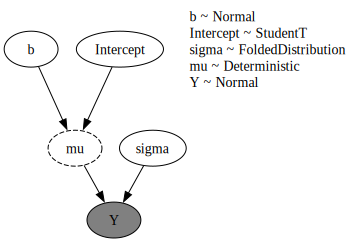

In [27]:
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from jax import random

def model(Y, X):
    # Data transformation
    N, K = X.shape
    Kc = K - 1
    means_X = jnp.mean(X[:, 1:], axis=0)  # Means of columns excluding the first (intercept)
    Xc = jnp.column_stack([X[:, 0], X[:, 1:] - means_X])  # Center the predictors

    # Priors
    b = numpyro.sample("b", dist.Normal(loc=0, scale=1), sample_shape=(Kc, ))
    Intercept = numpyro.sample("Intercept", dist.StudentT(df=3, loc=8, scale=10))
    sigma = numpyro.sample("sigma", dist.FoldedDistribution(dist.StudentT(df=3, loc=0, scale=10)))
    # sigma = numpyro.deterministic("sigma", jnp.abs(sigma_base))

    # Likelihood
    mu = numpyro.deterministic("mu", Intercept + jnp.dot(Xc[:, 1:], b))  # Linear predictor without intercept from Xc
    numpyro.sample("Y", dist.Normal(mu, sigma), obs=Y)

render_model(model, model_kwargs=data, render_distributions=True)

## 2.2. Specifying the kernel

Or use Sample Adaptive MCMC kernel from https://proceedings.neurips.cc/paper_files/paper/2019/file/2cfa8f9e50e0f510ede9d12338a5f564-Paper.pdf

In [28]:
from AMH import AMH
kernel = AMH(model)
# kernel = infer.NUTS(model)

## 2.3 Running MCMC

In [ ]:
mcmc = infer.MCMC(kernel, num_warmup=1000000, num_samples=100000, thinning=10, jit_model_args=True)
rng_key = random.PRNGKey(0)

mcmc.run(rng_key,
         **data,
         extra_fields=("potential_energy", "mean_accept_prob",)
        )

warmup:   2%|▏         | 19260/1100000 [00:05<04:51, 3712.05it/s, Acceptance rate: 0.00, Step size: 0.913]

In [36]:
mcmc.print_summary()


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
  Intercept     -2.41      0.08     -2.42     -2.42     -2.42   1268.17      1.00
       b[0]     -3.69      0.11     -3.69     -3.69     -3.69   1267.30      1.00
       b[1]     -2.30      0.09     -2.30     -2.30     -2.30   1267.76      1.00
       b[2]      0.52      0.01      0.52      0.52      0.52   1269.71      1.00
       b[3]     -2.99      0.07     -2.99     -2.99     -2.99   1267.77      1.00
       b[4]      1.55      0.76      1.53      1.53      1.53   1268.56      1.00
       b[5]      1.62      0.12      1.63      1.63      1.63   1265.85      1.00
       b[6]      2.74      0.59      2.73      2.73      2.73   1268.27      1.00
       b[7]     -1.02      0.01     -1.02     -1.02     -1.02   1246.64      1.00
       b[8]     -1.06      0.22     -1.07     -1.07     -1.07   1268.26      1.00
       b[9]     -1.35      0.32     -1.34     -1.34     -1.34   1268.55      1.00
      b[10]    

In [32]:
posterior_samples = mcmc.get_samples()
extra_fields = mcmc.get_extra_fields()

In [33]:
posterior_samples

{'Intercept': Array([ 0.52913725,  0.5468071 ,  0.55293113, ..., -2.416328  ,
        -2.416328  , -2.416328  ], dtype=float32),
 'b': Array([[ -7.7773104 ,   1.170886  ,   0.1118081 , ..., -39.792625  ,
          -1.5230525 ,   6.960458  ],
        [ -7.908164  ,   1.2084707 ,   0.09313473, ..., -40.645428  ,
          -1.5463555 ,   7.090755  ],
        [ -8.011691  ,   1.2321193 ,   0.07482557, ..., -41.235256  ,
          -1.5560938 ,   7.1828814 ],
        ...,
        [ -3.6912658 ,  -2.2982142 ,   0.5189593 , ...,   3.5690727 ,
           0.42795184,   1.0584997 ],
        [ -3.6912658 ,  -2.2982142 ,   0.5189593 , ...,   3.5690727 ,
           0.42795184,   1.0584997 ],
        [ -3.6912658 ,  -2.2982142 ,   0.5189593 , ...,   3.5690727 ,
           0.42795184,   1.0584997 ]], dtype=float32),
 'mu': Array([[ 33.54396   , -31.215126  , -22.752172  , ..., -45.52397   ,
         -11.192882  , -40.95646   ],
        [ 34.170456  , -31.806175  , -23.181215  , ..., -46.40378   ,
    

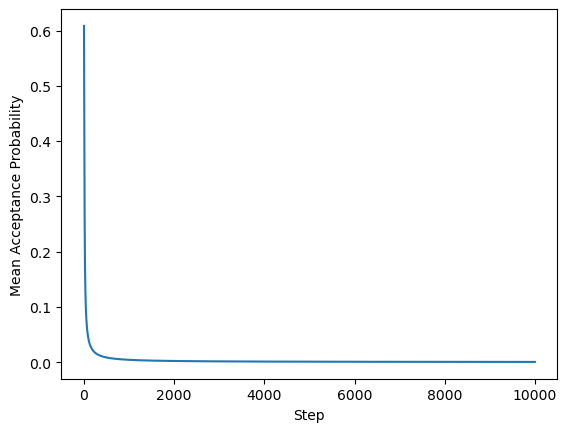

In [34]:
plt.plot(extra_fields['mean_accept_prob'])
plt.xlabel("Step")
plt.ylabel("Mean Acceptance Probability")
plt.show()

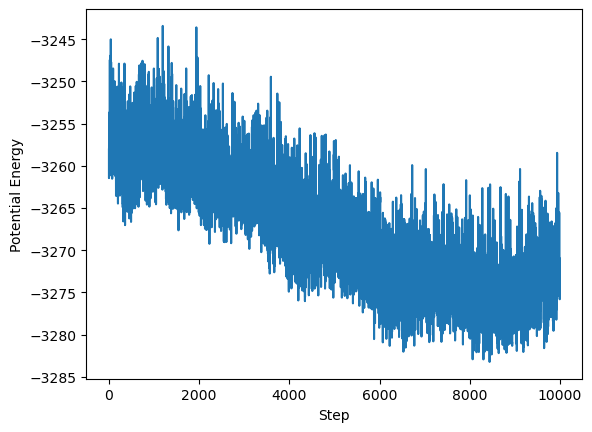

In [32]:
plt.plot(extra_fields["potential_energy"])
plt.xlabel("Step")
plt.ylabel("Potential Energy")
plt.show()

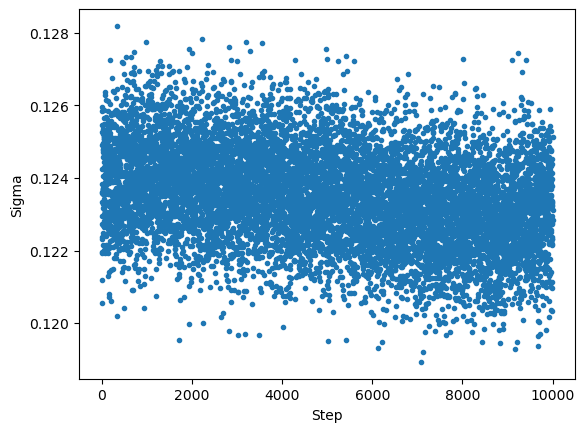

In [33]:
plt.plot(posterior_samples["sigma"], '.')
plt.xlabel("Step")
plt.ylabel("Sigma")
plt.show()

In [34]:
posterior_samples_df = pd.DataFrame({
    k: v
    for key, vals in posterior_samples.items()
    for k, v in ([(key, vals)] if vals.ndim==1 else zip([f"{key}[{i+1}]" for i in range(vals.shape[-1])], vals.T))
})

# posterior_samples_df["step"] = posterior_samples_df.index

posterior_samples_df

,Intercept,b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9],...,b[16],b[17],b[18],b[19],b[20],b[21],b[22],b[23],b[24],sigma
0,7.783779,6.966261,4.729894,-2.815545,1.163940,0.127954,-0.031745,0.015393,-0.003019,-0.442582,...,-0.237781,0.126365,-0.063618,0.020716,-0.000004,0.039365,-5.155434,3.359455,-1.206705,0.121953
1,7.785665,6.959894,4.736936,-2.816037,1.160425,0.129273,-0.033489,0.011556,0.004323,-0.436039,...,-0.228800,0.128399,-0.065958,0.018815,-0.000442,0.036649,-5.155883,3.358459,-1.205663,0.123342
2,7.785221,6.965348,4.740755,-2.813850,1.161461,0.133255,-0.027923,0.011041,-0.005300,-0.437031,...,-0.221850,0.131444,-0.065544,0.020913,-0.005809,0.027662,-5.166715,3.372712,-1.207753,0.125843
3,7.787255,6.950375,4.736402,-2.796590,1.144740,0.133415,-0.028103,0.014723,0.002382,-0.446714,...,-0.225917,0.123063,-0.071572,0.004660,-0.008427,0.024669,-5.153825,3.360448,-1.200464,0.121190
4,7.787416,6.957024,4.736708,-2.791751,1.147640,0.132857,-0.035614,0.016602,-0.004487,-0.445166,...,-0.214087,0.127603,-0.065507,0.003745,-0.003623,0.028152,-5.162725,3.360685,-1.197219,0.123845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.791090,6.949678,5.374429,-3.778893,1.401991,0.134455,-0.039289,0.020067,0.001856,-0.446264,...,-0.220099,0.131150,-0.060426,0.021612,-0.003612,0.028225,-5.649839,4.095427,-1.488899,0.123960
9996,7.787540,6.958518,5.387249,-3.798395,1.404876,0.136774,-0.041103,0.024121,0.000425,-0.449471,...,-0.220301,0.133454,-0.060281,0.023792,0.001209,0.028993,-5.668355,4.119353,-1.500208,0.123334
9997,7.786075,6.966161,5.381636,-3.794087,1.387886,0.135311,-0.044365,0.022143,-0.006527,-0.446289,...,-0.218874,0.137856,-0.053376,0.022966,0.004406,0.034521,-5.664714,4.112925,-1.495608,0.123112
9998,7.788903,6.968766,5.372868,-3.789675,1.391832,0.134965,-0.041984,0.015253,0.002475,-0.445834,...,-0.220989,0.138728,-0.062474,0.024584,0.008861,0.035840,-5.659745,4.097538,-1.484651,0.125141


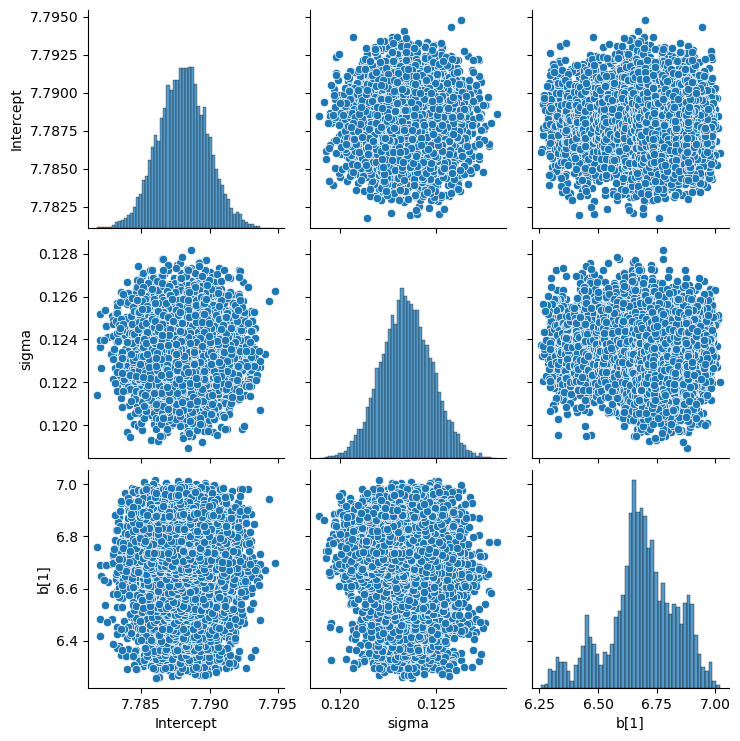

In [35]:
sns.pairplot(posterior_samples_df, vars=["Intercept", "sigma", "b[1]"])

# 3. Evaluation

In [117]:
combined_df = pd.concat([
    reference_draws_df.assign(source = "reference"),
    posterior_samples_df.assign(source = "samples"),
])
combined_df

,b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9],b[10],...,b[18],b[19],b[20],b[21],b[22],b[23],b[24],Intercept,sigma,source
0,6.558847,6.105568,-4.492008,1.568187,0.135701,-0.042189,0.024993,0.005900,-0.447776,-0.093153,...,-0.061160,0.019884,-0.007028,0.025016,-5.757860,4.384663,-1.532415,7.792967,0.123401,reference
1,6.852109,6.088976,-4.309645,1.302592,0.138684,-0.050193,0.033765,-0.001087,-0.450925,-0.093300,...,-0.048296,0.022392,-0.000269,0.026784,-5.822103,4.250303,-1.427493,7.788057,0.122009,reference
2,6.650531,6.013908,-4.449779,1.573739,0.124625,-0.032638,0.019638,-0.004168,-0.446881,-0.101230,...,-0.049002,0.018172,0.006315,0.038363,-5.865965,4.396349,-1.451338,7.789234,0.123128,reference
3,6.745017,6.412219,-4.962492,1.620767,0.140603,-0.044739,0.028786,-0.000455,-0.444529,-0.095642,...,-0.052483,0.022589,-0.000317,0.026576,-5.878313,4.555128,-1.685576,7.788277,0.124471,reference
4,6.529848,6.296251,-4.852639,1.725669,0.127325,-0.035958,0.021422,-0.002392,-0.446059,-0.098158,...,-0.061284,0.009773,-0.009712,0.029008,-6.053156,4.705672,-1.548416,7.791229,0.123913,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.949678,5.374429,-3.778893,1.401991,0.134455,-0.039289,0.020067,0.001856,-0.446264,-0.096128,...,-0.060426,0.021612,-0.003612,0.028225,-5.649839,4.095427,-1.488899,7.791090,0.123960,samples
9996,6.958518,5.387249,-3.798395,1.404876,0.136774,-0.041103,0.024121,0.000425,-0.449471,-0.086973,...,-0.060281,0.023792,0.001209,0.028993,-5.668355,4.119353,-1.500208,7.787540,0.123334,samples
9997,6.966161,5.381636,-3.794087,1.387886,0.135311,-0.044365,0.022143,-0.006527,-0.446289,-0.093923,...,-0.053376,0.022966,0.004406,0.034521,-5.664714,4.112925,-1.495608,7.786075,0.123112,samples
9998,6.968766,5.372868,-3.789675,1.391832,0.134965,-0.041984,0.015253,0.002475,-0.445834,-0.090350,...,-0.062474,0.024584,0.008861,0.035840,-5.659745,4.097538,-1.484651,7.788903,0.125141,samples


In [118]:
combined_df.to_csv("diamonds-diamonds.csv", index=False)

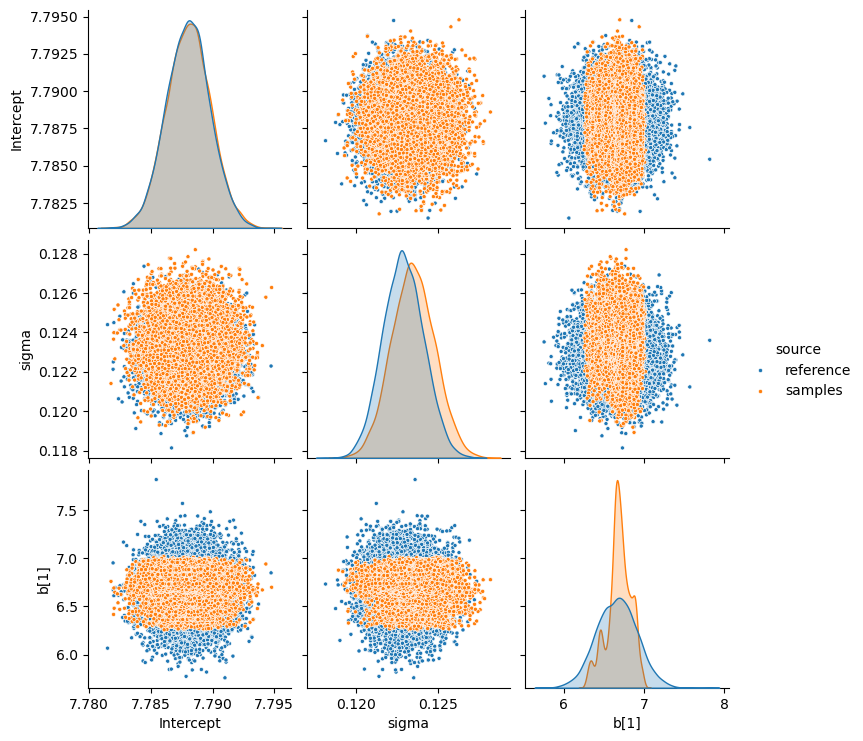

In [119]:
sns.pairplot(combined_df, hue="source", markers=".", vars=["Intercept", "sigma", "b[1]"])
plt.show()

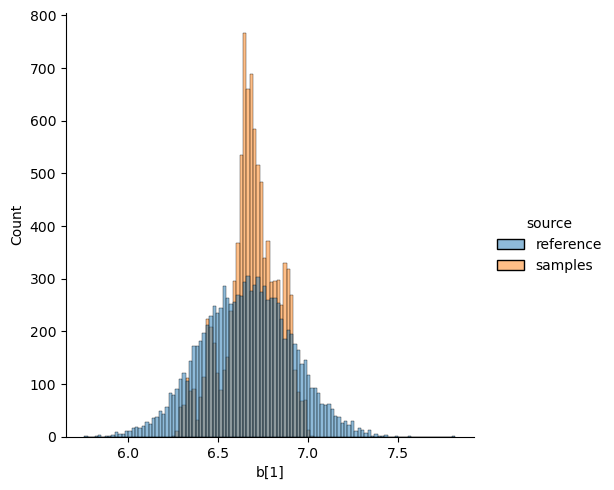

In [120]:
sns.displot(combined_df, x="b[1]", hue="source")
plt.show()

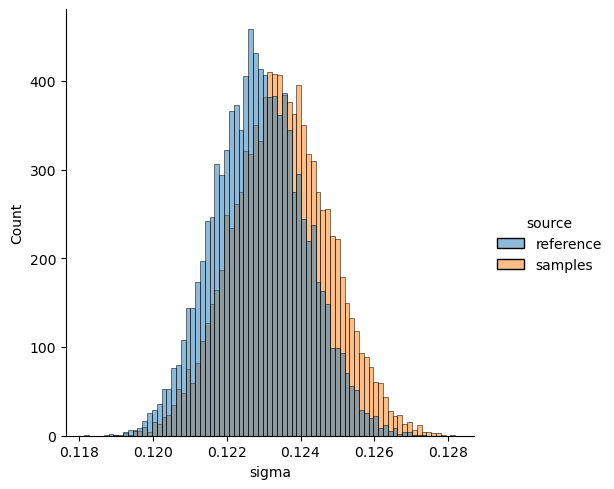

In [121]:
sns.displot(combined_df, x="sigma", hue="source")
plt.show()

In [124]:
arr_reference = jnp.array(combined_df.where(combined_df["source"] == "reference").dropna().drop(columns="source"))
arr_samples = jnp.array(combined_df.where(combined_df["source"] == "samples").dropna().drop(columns="source"))

## 3.1. Moments

RMSE of sampled moments of interest compared to a reference posterior moments

In [125]:
p = 2

pth_moments = combined_df.groupby("source").aggregate(lambda vals: np.mean(vals**p)).transpose().rename_axis(f"E[|X|^{p}]")
pth_moments["diff (%)"] = np.abs(pth_moments["reference"] - pth_moments["samples"])/(pth_moments["reference"])*100

pth_moments

source,reference,samples,diff (%)
E[|X|^2],,,
b[1],44.417422,44.700661,0.637675
b[2],40.598356,29.606578,27.074441
b[3],22.040444,13.948840,36.712526
b[4],2.113180,1.985428,6.045510
b[5],0.018108,0.018292,1.016479
b[6],0.001659,0.001652,0.435336
b[7],0.000552,0.000467,15.397300
b[8],0.000024,0.000020,16.064411
b[9],0.197932,0.198012,0.040199


In [128]:
from evaluation import pth_moment_rmse

In [129]:
%%time
pth_moment_rmse(x, y)

CPU times: user 841 μs, sys: 305 μs, total: 1.15 ms
Wall time: 672 μs


Array(5.2735467, dtype=float32)

In [123]:
n = 5000
x = arr_reference[:n]
y = arr_samples[:n]

## 3.2. Wasserstein-1 Distance

$$ \mathcal{W}(u, v) = \inf_{\xi \in \mathcal{C} (u, v)} \int \| x-y \|_2 \xi (dx,dy) $$

### 3.2.1. Optimal 1-1 coupling

In [127]:
from evaluation import wasserstein_dist11_p

In [130]:
%%time
wasserstein_dist11_p(x, y)

KeyboardInterrupt: 

In [47]:
solve_fn = jit(linear.solve)

def wasserstein_distance_ot(u_values, v_values), cost_fn=costs.Euclidean():
    geom = pointcloud.PointCloud(x=u_values, y=v_values, cost_fn=cost_fn)
    ot = solve_fn(geom)
    return ot.primal_cost.item()

In [73]:
# geom = pointcloud.PointCloud(x=x, y=y, cost_fn=costs.Euclidean())
# solve_fn = jit(linear.solve)
# ot = solve_fn(geom)

# print(
#     " Sinkhorn has converged: ",
#     ot.converged,
#     "\n",
#     "Error upon last iteration: ",
#     ot.errors[(ot.errors > -1)][-1],
#     "\n",
#     "Sinkhorn required ",
#     jnp.sum(ot.errors > -1),
#     " iterations to converge. \n",
#     "Entropy regularized OT cost: ",
#     ot.ent_reg_cost,
#     "\n",
#     "OT cost (without entropy): ",
#     jnp.sum(ot.matrix * ot.geom.cost_matrix),
# )

In [48]:
%%time

wasserstein_distance_ot(x, y)

CPU times: user 4.82 s, sys: 2.07 s, total: 6.89 s
Wall time: 2.79 s


2.876431941986084

In [93]:
def wasserstein_1d(mu, nu, p=2.0):
    """
    Compute the 1D Wasserstein distance between two arrays.
    
    Parameters:
    - mu, nu: 1D arrays.
    
    Returns:
    - float: The Wasserstein distance in 1D.
    """

    # Compute the absolute differences
    diff = jnp.abs(jnp.sort(mu) - jnp.sort(nu))
    
    # Raise to the power of p
    diff_p = diff ** p
    
    # Compute the p-th root of the sum of differences to the power p
    return jnp.power(jnp.mean(diff_p), 1.0 / p)


def max_sliced_wasserstein(mu, nu, rng_key, p=2.0, n_directions=1000):
    """
    Approximate the Wasserstein distance using the max-sliced approach with JAX.

    Parameters:
    - mu, nu: jnp.arrays of shape (n_samples, n_dimensions) representing 
              points sampled from two distributions.
    - key: JAX PRNG key for randomness.
    - n_directions: Number of random directions to project onto.

    Returns:
    - float: An approximation of the Wasserstein distance.
    """
    n_dim = mu.shape[1]
    
    # Generate random directions on the unit sphere
    directions = random.normal(rng_key, (n_directions, n_dim))
    directions = directions / jnp.linalg.norm(directions, axis=1, keepdims=True)
    
    # Vectorizing projection and 1D Wasserstein computation over directions
    project_and_compute = vmap(lambda dir: wasserstein_1d(
        jnp.dot(mu, dir),
        jnp.dot(nu, dir),
        p=p
    ))
    
    distances = project_and_compute(directions)
    
    return jnp.max(distances)

In [94]:
%%time

rng_key, key_wasserstein = random.split(rng_key, 2)
max_sliced_wasserstein(x, y, key_wasserstein, n_directions=10000).item()

CPU times: user 26.2 s, sys: 481 ms, total: 26.7 s
Wall time: 26 s


1.9741389751434326

In [ ]:
%%time

wasserstein_distance_nd(x, y)

## 3.3. Maximum Mean Discrepancy

Given a symmetric, positive-definite kernel kernel $k(\cdot,\cdot): \mathcal{X} \times \mathcal{X} \to \mathbb{R}$,
the MMD between distributions $P$ and $Q$ is given by

$$ MMD(P, Q)^2 = \int_{\mathcal{X} \times \mathcal{X}} k(x, x') P(dx)P(dx') + \int_{\mathcal{X} \times \mathcal{X}} k(y, y') Q(dy)Q(dy') - 2\int_{\mathcal{X} \times \mathcal{X}} k(x, y) P(dx)Q(dy) $$

Unbiased estimator:

$$ MMD(\widehat{P}_n, \widehat{Q}_m)^2 = \frac{1}{n(n-1)}\sum_{i \neq i'}k(x_i, x_{i'}) + \frac{1}{m(m-1)}\sum_{j \neq j'}k(y_j, y_{j'}) - \frac{2}{mn}\sum_{i, j}k(x_i, y_j) $$

Usually Gaussian kernel is used with

$$ k(x,y) := \exp \left( -\gamma \| x-y \|^2 \right) $$.


In [91]:
def gaussian_kernel(x, y, gamma):
    """
    Compute the Gaussian kernel between vectors x and y.
    
    :param x: Jax array of shape (n, d)
    :param y: Jax array of shape (m, d)
    :param gamma: Bandwidth parameter for the Gaussian kernel
    :return: Jax array of shape (n, m)
    """

    eucl_dist2 = jnp.sqrt(((x[:, None, :] - y[None, :, :]) ** 2).sum(-1))
    
    return jnp.exp(-gamma * eucl_dist2)

@jit
def mmd_unbiased(x, y, gamma=1.0):
    """
    Compute the unbiased MMD estimator between two sets of samples.

    :param x: Jax array of shape (n, d)
    :param y: Jax array of shape (m, d)
    :param gamma: Bandwidth parameter for the Gaussian kernel
    :return: Scalar value representing the MMD^2
    """
    n = x.shape[0]
    m = y.shape[0]
    
    # Compute kernel matrices
    Kxx = gaussian_kernel(x, x, gamma)
    Kyy = gaussian_kernel(y, y, gamma)
    Kxy = gaussian_kernel(x, y, gamma)

    # Diagonal elements set to 0 for the unbiased estimator
    Kxx = Kxx.at[jnp.arange(n), jnp.arange(n)].set(0)
    Kyy = Kyy.at[jnp.arange(m), jnp.arange(m)].set(0)
    
    # Compute each term in the MMD formula
    mmd = jnp.sum(Kxx) / (n * (n - 1)) + jnp.sum(Kyy) / (m * (m - 1)) - 2 * jnp.sum(Kxy) / (n * m)
    
    return mmd

In [92]:
%%time
mmd_unbiased(x, y).item()

CPU times: user 1.34 s, sys: 15.1 ms, total: 1.36 s
Wall time: 299 ms


0.8688206076622009

## 3.4. Pareto-$\hat{k}$ diagnostic

See https://arxiv.org/abs/1507.02646